A equação de laplace é dada por:

\begin{equation}
  \nabla^2u(x,y) = 0
\end{equation}

Com condições de contorno no domínio $(x,y) \in [0,1] \times [0,1]$ :

\begin{cases}
  u(0,y) = 0\\
  u(1,y) = 0\\
  u(x,0) = 0\\
  u(x,1) = sin(\pi x)sinh(\pi)
\end{cases}

Que possui solução exata dada por:

\begin{equation}
  u(x,y) = sin(\pi x)sinh(\pi y)
\end{equation}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [ ]:
#dimensões do domínio
x0 = 0
xf = 1
y0 = 0
yf = 1

#número de pontos e discretização do domínio
n = 100
dx = (xf - x0)/(n-1)
dy = (yf - y0)/(n-1)

#arrays com os pontos para iterar
x = np.arange(x0, xf + dx, dx)
y = np.arange(y0, yf + dy, dy)

X, Y = np.meshgrid(x, y)

In [ ]:
U = np.sin(np.pi * X) * np.sinh(np.pi * Y)

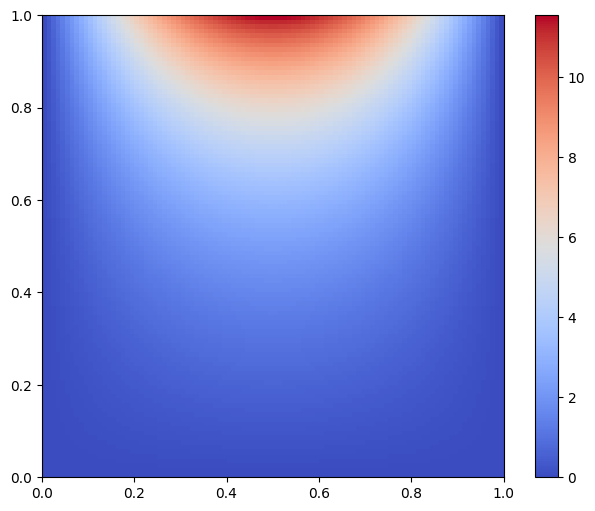

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(U, extent=[0,1,0,1], origin='lower', cmap='coolwarm')
plt.colorbar()
plt.show()

# Malha estruturada

Pela formulação dos volumes finitos:

\begin{equation}
  \int_{VC} (\nabla^2 u) dV = 0
\end{equation}

Usando o teorema de Gauss:

\begin{align}
  \int_{\partial V} (\nabla u \cdot n) dS = 0 \\
\end{align}

\begin{equation}
  \sum_{k=1}^{NumFaces} (\nabla u_k \cdot n_k) \Delta S_k = 0
\end{equation}

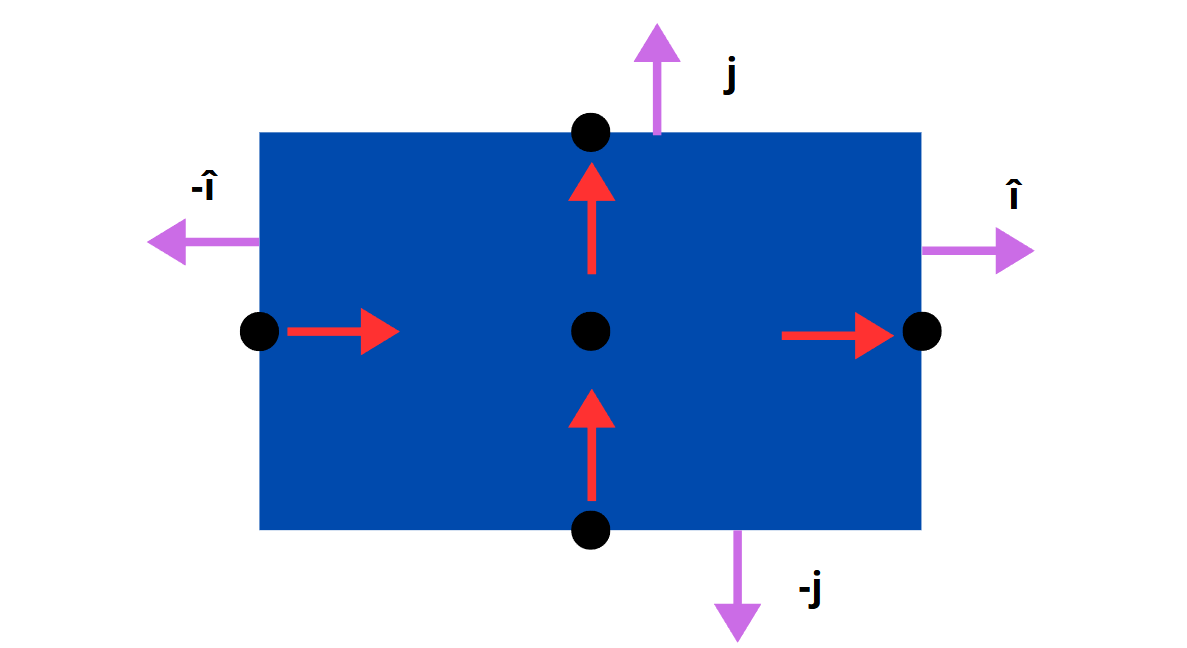

\begin{equation}
\frac{(u_E - u_P)}{\Delta x} \hat{i} \cdot \hat{i} \Delta y + \frac{(u_P - u_W)}{\Delta x} \hat{i} \cdot -\hat{i} \Delta y + \frac{(u_N - u_P)}{\Delta y} \hat{j} \cdot \hat{j} \Delta x + \frac{(u_P - u_S)}{\Delta y} \hat{j} \cdot -\hat{j} \Delta x = 0
\end{equation}

Fazendo o produto dos vetores:
\begin{equation}
\frac{(u_E - u_P)}{\Delta x} \Delta y - \frac{(u_P - u_W)}{\Delta x} \Delta y + \frac{(u_N - u_P)}{\Delta y} \Delta x - \frac{(u_P - u_S)}{\Delta y} \Delta x = 0
\end{equation}

Agrupando coeficientes:

\begin{equation}
  u_P(\frac{-2\Delta y}{\Delta x} + \frac{-2\Delta x}{\Delta y}) + u_E(\frac{\Delta y}{\Delta x}) + u_W(\frac{\Delta y}{\Delta x}) + u_N(\frac{\Delta x}{\Delta y}) + u_S(\frac{\Delta x}{\Delta y}) = 0
\end{equation}

Passando o $u_P$ para o outro lado:

\begin{equation}
   u_E(\frac{\Delta y}{\Delta x}) + u_W(\frac{\Delta y}{\Delta x}) + u_N(\frac{\Delta x}{\Delta y}) + u_S(\frac{\Delta x}{\Delta y}) = u_P(\frac{2\Delta y}{\Delta x} + \frac{2\Delta x}{\Delta y})
\end{equation}

Como $\Delta y = \Delta x$:
\begin{equation}
   u_E + u_W + u_N + u_S = 4u_P
\end{equation}

In [ ]:
@njit
def solver():
  #método iterativo
  epsilon = 1e-3
  error = 1
  iter = 0

  #aplicação das condições de contorno
  solution = np.zeros((n,n))
  solution[:,0] = 0
  solution[:,-1] = 0
  solution[-1,:] = 0
  solution[0, :] = np.sin(np.pi * x)*np.sinh(np.pi)

  u_old = solution.copy()

  # jacobi
  while error > epsilon:
    for i in range(1, n-1):
      for j in range(1,n-1):
        solution[i,j] = (u_old[i, j+1]+ u_old[i, j-1] + u_old[i+1, j] + u_old[i-1, j]) / 4.0
    error = np.linalg.norm(solution - u_old, ord=np.inf)
    u_old[:, :] = solution
    iter += 1

  return solution

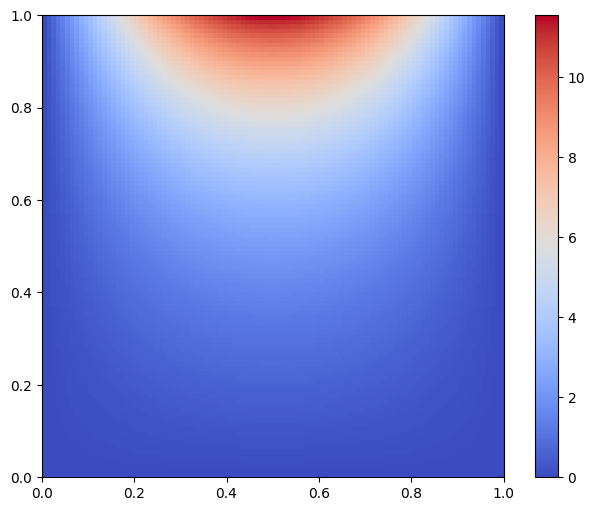

In [ ]:
solution = solver()

plt.figure(figsize=(8, 6))
plt.imshow(solution, extent=[0,1,0,1], cmap='coolwarm')
plt.colorbar()
plt.show()